In [1]:
!nvidia-smi

Tue Dec  3 07:05:37 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.35.03              Driver Version: 560.35.03      CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   30C    P8              9W /   70W |       1MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/kaggle/working


In [3]:
! pip install rasterio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 82.1 MB/s eta 0:00:00:00:0100:01


In [4]:
# Pip install method (recommended)

!pip install ultralytics==8.2.103 -q

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.103 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 6013.5/8062.4 GB disk)


In [5]:
from ultralytics import YOLO

from IPython.display import display, Image

### ** Custom Training**


In [6]:
!yolo task=segment mode=train model=yolov8s-seg.pt data="/kaggle/input/yaml-file-new/yolo.yaml" epochs=10 imgsz=512

100%|███████████████████████████████████████| 22.8M/22.8M [00:00<00:00, 238MB/s]
New https://pypi.org/project/ultralytics/8.3.40 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.103 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=segment, mode=train, model=yolov8s-seg.pt, data=/kaggle/input/yaml-file-new/yolo.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=512, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=

###  **Inference with Custom Model**

In [7]:
!yolo task=segment mode=predict model="/kaggle/working/runs/segment/train/weights/best.pt" conf=0.25 source="/kaggle/input/prepared-dataset-yolov8/test/images" save=true

Ultralytics YOLOv8.2.103 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8s-seg summary (fused): 195 layers, 11,779,987 parameters, 0 gradients, 42.4 GFLOPs

image 1/100 /kaggle/input/prepared-dataset-yolov8/test/images/Ajeethasree_kalburgi_139_512_1024_png.rf.031e96e2be2eb75ce318a762c01cc4a9.jpg: 512x512 3 0s, 14.3ms
image 2/100 /kaggle/input/prepared-dataset-yolov8/test/images/Ajeethasree_kalburgi_141_0_0_png.rf.887d16fbdf9246f639aa99f9f5aa41b3.jpg: 512x512 2 0s, 14.3ms
image 3/100 /kaggle/input/prepared-dataset-yolov8/test/images/Ajeethasree_kalburgi_162_1024_2048_png.rf.9fb8d171eabdf1156b5c03784c8ffe5f.jpg: 512x512 2 0s, 14.2ms
image 4/100 /kaggle/input/prepared-dataset-yolov8/test/images/Ajeethasree_kalburgi_162_2048_3072_png.rf.1a8a8f1f30441e6caf7b9204b1c8b41c.jpg: 512x512 2 0s, 14.2ms
image 5/100 /kaggle/input/prepared-dataset-yolov8/test/images/Ajeethasree_kalburgi_162_3072_3072_png.rf.0f45d6938fa1a81ffc8baddc2594baaa.jpg: 512x512 2 0s, 14.3ms
image 6/100 /kaggle/

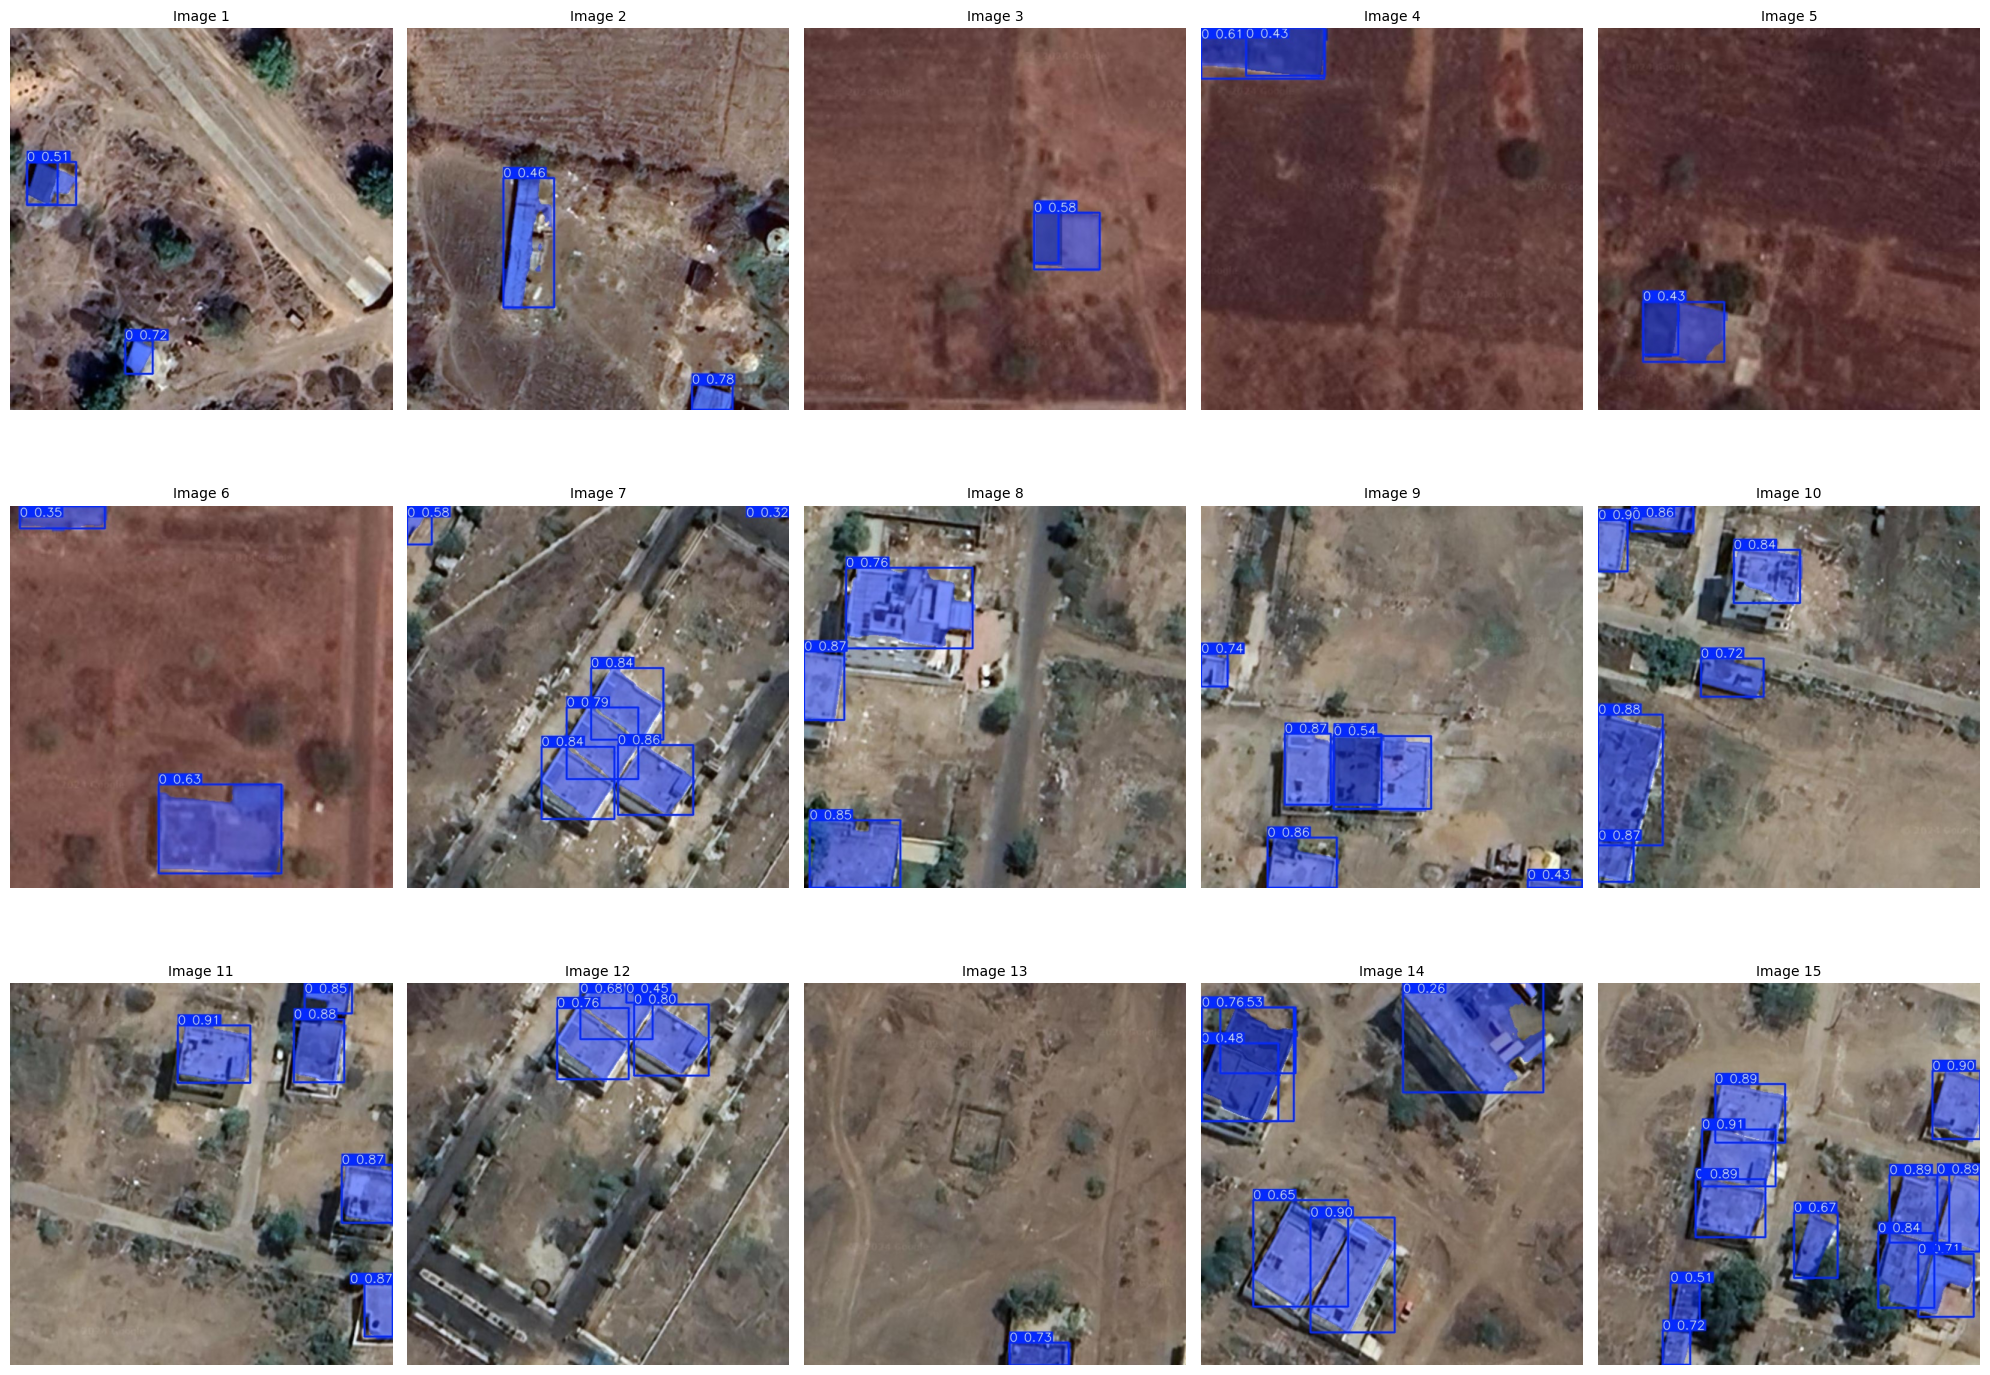

In [3]:
import os
from matplotlib import pyplot as plt
from PIL import Image

# Directory containing model-predicted images
predicted_images_dir = "/kaggle/working/runs/segment/predict"

# Get all image files in the directory
image_files = sorted(
    [f for f in os.listdir(predicted_images_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.tif'))]
)

# Number of images to display
num_images_to_display = min(15, len(image_files))

if num_images_to_display == 0:
    print("No images found in the directory.")
else:
    # Adjust the number of columns and rows for a larger display
    columns = 5  # Number of images per row
    rows = (num_images_to_display + columns - 1) // columns  # Calculate rows dynamically
    
    plt.figure(figsize=(20, rows * 5))  # Larger figure size for better clarity
    
    for i in range(num_images_to_display):
        image_path = os.path.join(predicted_images_dir, image_files[i])
        img = Image.open(image_path)
        
        plt.subplot(rows, columns, i + 1)
        plt.imshow(img)
        plt.axis("off")
        plt.title(f"Image {i + 1}", fontsize=10)  # Adjust font size for clarity

    plt.tight_layout()  # Adjust spacing between images
    plt.show()
